In [1]:
#
# Step 1: Import Necessary Libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#
# Step 2: Load the Dataset
#
file_path = '/content/sample-data-audio - 2-months.csv'
try:
    df_audio = pd.read_csv(file_path)
    print(f"Step 2: Dataset '{file_path}' loaded successfully.")
    print(f"Initial dataset shape: {df_audio.shape[0]} rows, {df_audio.shape[1]} columns.")
except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' was not found. Please make sure you have uploaded it to Google Colab.")

Step 2: Dataset '/content/sample-data-audio - 2-months.csv' loaded successfully.
Initial dataset shape: 21108 rows, 17 columns.


In [3]:
#
# Step 3: Clean the Data
#
print("\nStep 3: Starting data cleaning process...")

# Create a copy to preserve the original dataframe
df_clean = df_audio.copy()

# Handle Missing Values
df_clean.drop(columns=['country'], inplace=True)
df_clean['level2_name'].fillna('Unknown', inplace=True)
df_clean['level3_name'].fillna('Unknown', inplace=True)
print("- Missing values handled.")

# Correct Data Types
df_clean['date'] = pd.to_datetime(df_clean['date'])
print("- 'date' column converted to datetime.")

# Remove Data Errors (Negative Prices)
n_negative_price = len(df_clean[df_clean['price'] < 0])
df_clean = df_clean[df_clean['price'] >= 0]
print(f"- Found and removed {n_negative_price} rows with negative prices.")

# Remove Duplicates
n_duplicates = df_clean.duplicated().sum()
df_clean.drop_duplicates(inplace=True)
print(f"- Found and removed {n_duplicates} duplicate rows.")

print(f"Data cleaning complete. Cleaned dataset shape: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns.")


Step 3: Starting data cleaning process...
- Missing values handled.
- 'date' column converted to datetime.
- Found and removed 11 rows with negative prices.
- Found and removed 1836 duplicate rows.
Data cleaning complete. Cleaned dataset shape: 19261 rows, 16 columns.


/tmp/ipython-input-1183337717.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['level2_name'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1183337717.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [4]:
#
# Step 4: Category and Brand Dominance Analysis
#
print("\nStep 4: Analyzing and visualizing category and brand dominance...")

# Set plot style
sns.set_style("whitegrid")

# --- Dominant Category Analysis ---
plt.figure(figsize=(12, 7))
# Top 10 by volume
top_categories_volume = df_clean['generic_name'].value_counts().nlargest(10)
plt.subplot(1, 2, 1)
sns.barplot(y=top_categories_volume.index, x=top_categories_volume.values, palette="viridis")
plt.title('Top 10 Categories by Transaction Volume', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
# Top 10 by value
top_categories_value = df_clean.groupby('generic_name')['price'].sum().nlargest(10)
plt.subplot(1, 2, 2)
sns.barplot(y=top_categories_value.index, x=top_categories_value.values, palette="plasma")
plt.title('Top 10 Categories by Sales Value', fontsize=14)
plt.xlabel('Total Sales Value (in INR)', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.savefig('category_dominance.png')
plt.close()
print("- Generated 'category_dominance.png'")

# --- Dominant Brand Analysis ---
plt.figure(figsize=(12, 7))
# Top 10 by volume
top_brands_volume = df_clean['brand'].value_counts().nlargest(10)
plt.subplot(1, 2, 1)
sns.barplot(y=top_brands_volume.index, x=top_brands_volume.values, palette="viridis")
plt.title('Top 10 Brands by Transaction Volume', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Brand', fontsize=12)
# Top 10 by value
top_brands_value = df_clean.groupby('brand')['price'].sum().nlargest(10)
plt.subplot(1, 2, 2)
sns.barplot(y=top_brands_value.index, x=top_brands_value.values, palette="plasma")
plt.title('Top 10 Brands by Sales Value', fontsize=14)
plt.xlabel('Total Sales Value (in INR)', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.savefig('brand_dominance.png')
plt.close()
print("- Generated 'brand_dominance.png'")



Step 4: Analyzing and visualizing category and brand dominance...


/tmp/ipython-input-3287854271.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories_volume.index, x=top_categories_volume.values, palette="viridis")
/tmp/ipython-input-3287854271.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories_value.index, x=top_categories_value.values, palette="plasma")


- Generated 'category_dominance.png'


/tmp/ipython-input-3287854271.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_brands_volume.index, x=top_brands_volume.values, palette="viridis")
/tmp/ipython-input-3287854271.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_brands_value.index, x=top_brands_value.values, palette="plasma")


- Generated 'brand_dominance.png'


In [5]:
#
# Step 5: Market Concentration (Pareto) Analysis
#
print("\nStep 5: Analyzing and visualizing market concentration...")

# --- Brand Concentration ---
brand_revenue = df_clean.groupby('brand')['price'].sum().sort_values(ascending=False)
brand_revenue_df = brand_revenue.to_frame().reset_index()
brand_revenue_df['cumulative_sum'] = brand_revenue_df['price'].cumsum()
brand_revenue_df['cumulative_perc'] = 100 * brand_revenue_df['cumulative_sum'] / brand_revenue_df['price'].sum()
brands_80_perc = brand_revenue_df[brand_revenue_df['cumulative_perc'] <= 80]
num_brands_for_80_perc = len(brands_80_perc)
total_brands = len(brand_revenue_df)
perc_brands_for_80_perc = (num_brands_for_80_perc / total_brands) * 100
print("\n--- Brand Concentration (Pareto Analysis) ---")
print(f"Just {perc_brands_for_80_perc:.2f}% of brands account for 80% of total revenue.")

# --- Category Concentration ---
category_revenue = df_clean.groupby('generic_name')['price'].sum().sort_values(ascending=False)
category_revenue_df = category_revenue.to_frame().reset_index()
category_revenue_df['cumulative_sum'] = category_revenue_df['price'].cumsum()
category_revenue_df['cumulative_perc'] = 100 * category_revenue_df['cumulative_sum'] / category_revenue_df['price'].sum()
categories_80_perc = category_revenue_df[category_revenue_df['cumulative_perc'] <= 80]
num_categories_for_80_perc = len(categories_80_perc)
total_categories = len(category_revenue_df)
perc_categories_for_80_perc = (num_categories_for_80_perc / total_categories) * 100
print("\n--- Category Concentration (Pareto Analysis) ---")
print(f"Just {perc_categories_for_80_perc:.2f}% of categories account for 80% of total revenue.")

# --- Pareto Visualization ---
plt.figure(figsize=(12, 6))
# Brand Pareto
ax1 = plt.subplot(1, 2, 1)
ax1.bar(brand_revenue_df.index, brand_revenue_df['price'], color='C0')
ax1.set_title('Brand Revenue Distribution (Pareto)', fontsize=14)
ax1.set_xlabel('Brand Rank', fontsize=12)
ax1.set_ylabel('Revenue', color='C0', fontsize=12)
ax2 = ax1.twinx()
ax2.plot(brand_revenue_df.index, brand_revenue_df['cumulative_perc'], color='C1', marker='o', ms=4)
ax2.axhline(80, color='r', linestyle='--')
ax2.set_ylabel('Cumulative Revenue Percentage (%)', color='C1', fontsize=12)
ax2.set_ylim(0, 105)
# Category Pareto
ax3 = plt.subplot(1, 2, 2)
ax3.bar(category_revenue_df.index, category_revenue_df['price'], color='C0')
ax3.set_title('Category Revenue Distribution (Pareto)', fontsize=14)
ax3.set_xlabel('Category Rank', fontsize=12)
ax3.set_ylabel('Revenue', color='C0', fontsize=12)
ax4 = ax3.twinx()
ax4.plot(category_revenue_df.index, category_revenue_df['cumulative_perc'], color='C1', marker='o', ms=4)
ax4.axhline(80, color='r', linestyle='--')
ax4.set_ylabel('Cumulative Revenue Percentage (%)', color='C1', fontsize=12)
ax4.set_ylim(0, 105)
plt.tight_layout()
plt.savefig('pareto_analysis.png')
plt.close()
print("\n- Generated 'pareto_analysis.png'")

print("\n\n✅ Analysis Complete. You can find the generated chart images in the Colab file browser.")



Step 5: Analyzing and visualizing market concentration...

--- Brand Concentration (Pareto Analysis) ---
Just 2.67% of brands account for 80% of total revenue.

--- Category Concentration (Pareto Analysis) ---
Just 1.88% of categories account for 80% of total revenue.

- Generated 'pareto_analysis.png'


✅ Analysis Complete. You can find the generated chart images in the Colab file browser.


--- Category Dominance Chart ---


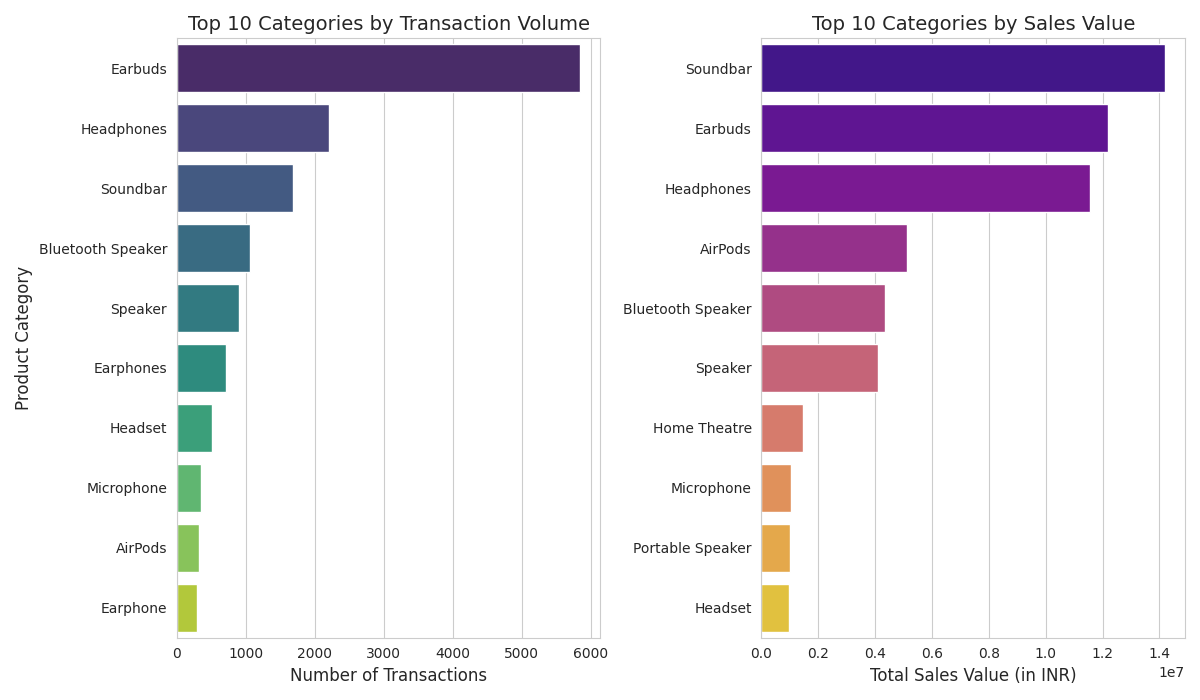


--- Brand Dominance Chart ---


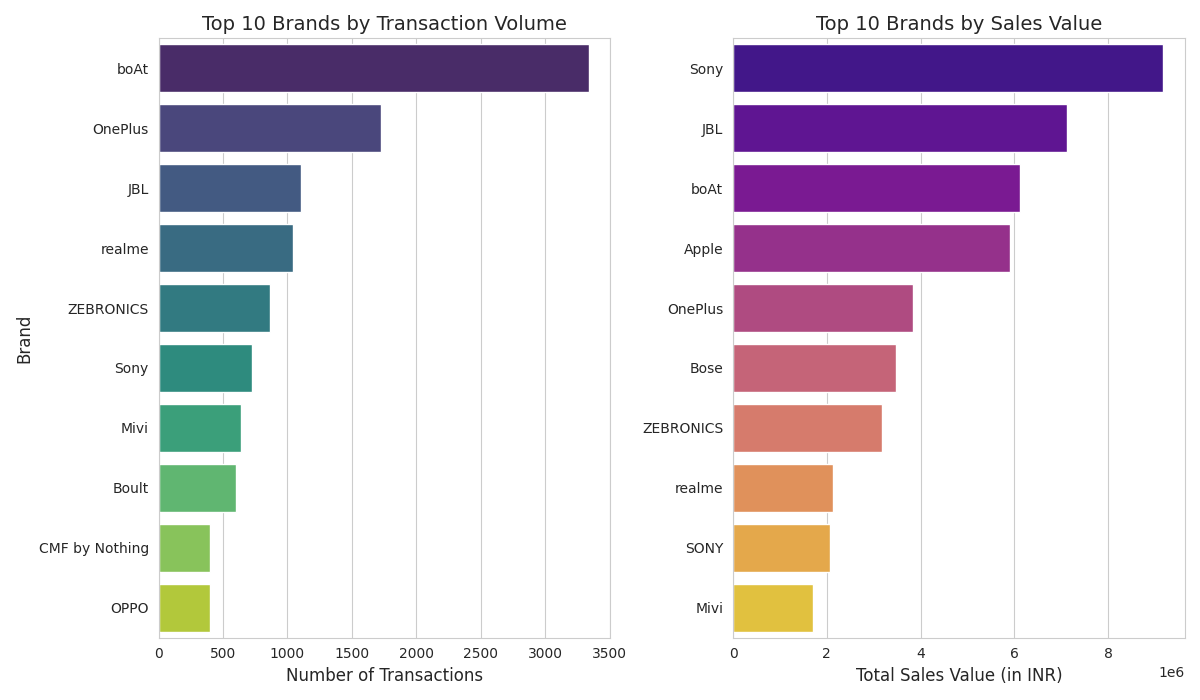


--- Pareto Analysis Chart ---


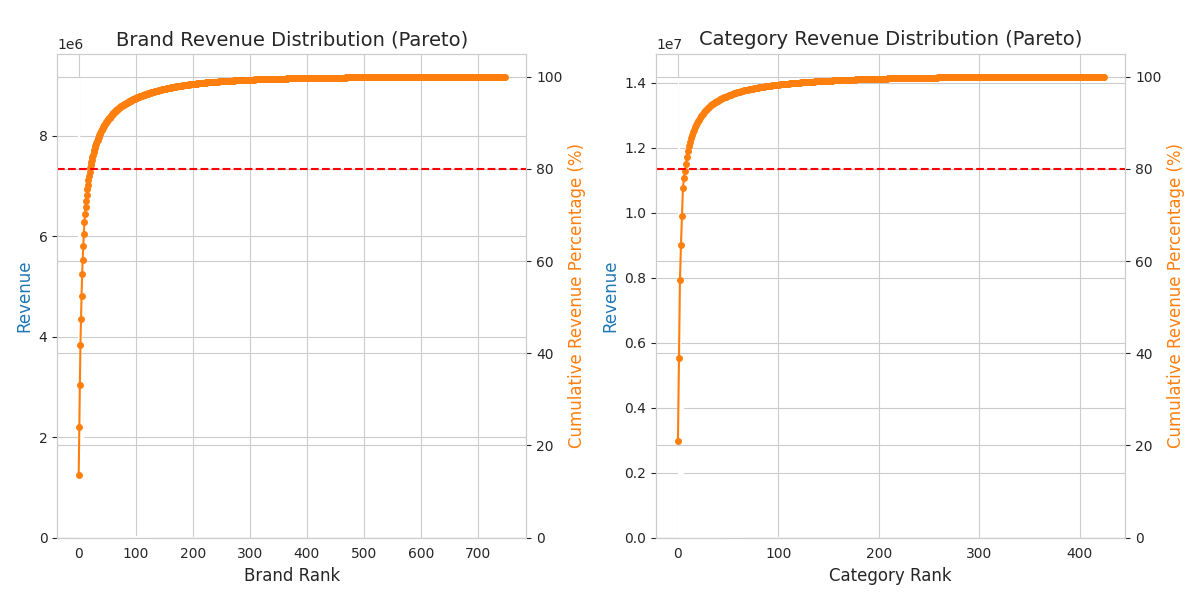

In [6]:
# Import the necessary libraries to display images
from IPython.display import Image, display

# Display the images one by one
print("--- Category Dominance Chart ---")
display(Image(filename='category_dominance.png'))

print("\n--- Brand Dominance Chart ---")
display(Image(filename='brand_dominance.png'))

print("\n--- Pareto Analysis Chart ---")
display(Image(filename='pareto_analysis.png'))

What We've Completed So Far

Data Cleaning & Preparation: We have successfully loaded, cleaned, and prepared the dataset for analysis.

Category & Brand Dynamics: We've identified the dominant brands and product categories by both sales volume and revenue.

Market Concentration Analysis: We've visualized and quantified the Pareto (80/20) effect, showing that a small number of brands and categories control a large portion of the market.

In [7]:
#
# Step 6: Price Sensitivity Analysis
#
print("\nStep 6: Analyzing price sensitivity...")

# --- 1. Price Distribution Histogram ---
plt.figure(figsize=(12, 6))
# We'll plot the log of the price to handle the skewness from a few very expensive items
# Adding 1 to price to avoid log(0) issues
sns.histplot(np.log1p(df_clean['price']), kde=True, bins=50)
plt.title('Distribution of Product Prices (Log Scale)', fontsize=16)
plt.xlabel('Log of Price', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.savefig('price_distribution.png')
plt.close()
print("- Generated 'price_distribution.png'")

# --- 2. Price Segmentation ---
# Define price segments using quantiles to ensure even distribution of products
quantiles = df_clean['price'].quantile([0.25, 0.5, 0.75]).to_dict()
q1 = quantiles[0.25]
q2 = quantiles[0.5]
q3 = quantiles[0.75]

def assign_price_segment(price):
    if price <= q1:
        return '1. Low-Range'
    elif price <= q2:
        return '2. Mid-Range'
    elif price <= q3:
        return '3. High-Range'
    else:
        return '4. Premium'

df_clean['price_segment'] = df_clean['price'].apply(assign_price_segment)

# Calculate sales volume and value per segment
segment_analysis = df_clean.groupby('price_segment')['price'].agg(['count', 'sum'])
segment_analysis.columns = ['Transaction Volume', 'Total Sales Value']

print("\n--- Sales by Price Segment ---")
print(segment_analysis)


# --- 3. Visualize Sales by Price Segment ---
plt.figure(figsize=(12, 6))

# Plot Transaction Volume
plt.subplot(1, 2, 1)
sns.barplot(x=segment_analysis.index, y=segment_analysis['Transaction Volume'], palette='magma')
plt.title('Transaction Volume by Price Segment', fontsize=14)
plt.xlabel('Price Segment', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Plot Total Sales Value
plt.subplot(1, 2, 2)
sns.barplot(x=segment_analysis.index, y=segment_analysis['Total Sales Value'], palette='magma')
plt.title('Total Sales Value by Price Segment', fontsize=14)
plt.xlabel('Price Segment', fontsize=12)
plt.ylabel('Total Sales Value (in INR)', fontsize=12)

plt.tight_layout()
plt.savefig('sales_by_price_segment.png')
plt.close()
print("- Generated 'sales_by_price_segment.png'")

print("\n\n Price Sensitivity analysis complete.")


Step 6: Analyzing price sensitivity...
- Generated 'price_distribution.png'

--- Sales by Price Segment ---
               Transaction Volume  Total Sales Value
price_segment                                       
1. Low-Range                 5053            2829454
2. Mid-Range                 4593            5667922
3. High-Range                4807            9707946
4. Premium                   4808           49691431


/tmp/ipython-input-739813678.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_analysis.index, y=segment_analysis['Transaction Volume'], palette='magma')
/tmp/ipython-input-739813678.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_analysis.index, y=segment_analysis['Total Sales Value'], palette='magma')


- Generated 'sales_by_price_segment.png'


 Price Sensitivity analysis complete.


--- Price Distribution Chart ---


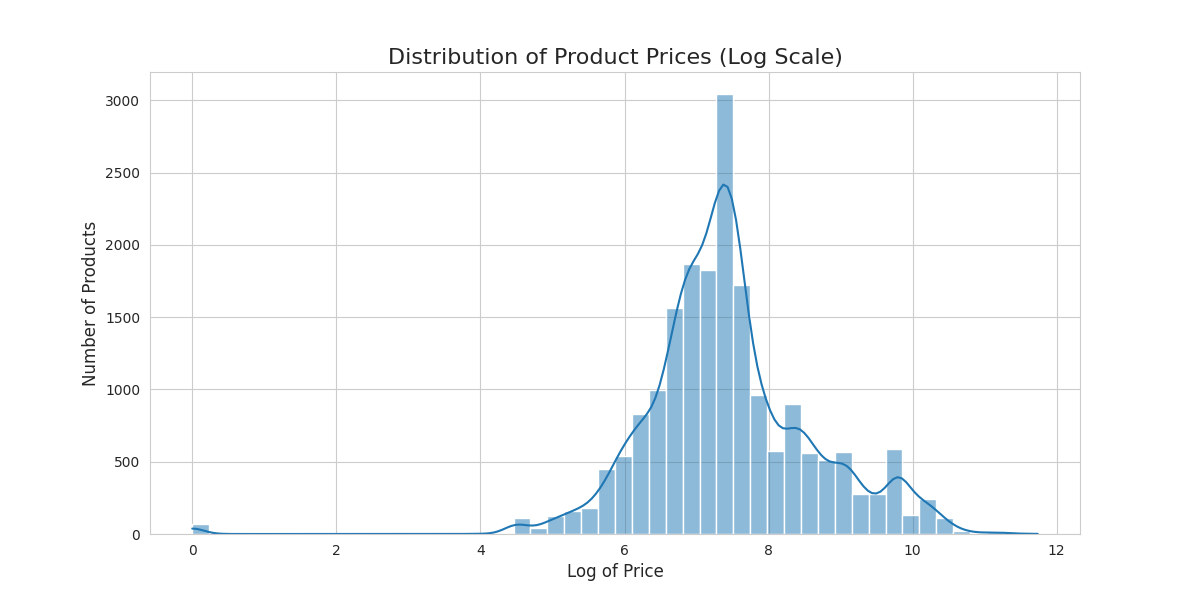


--- Sales by Price Segment Chart ---


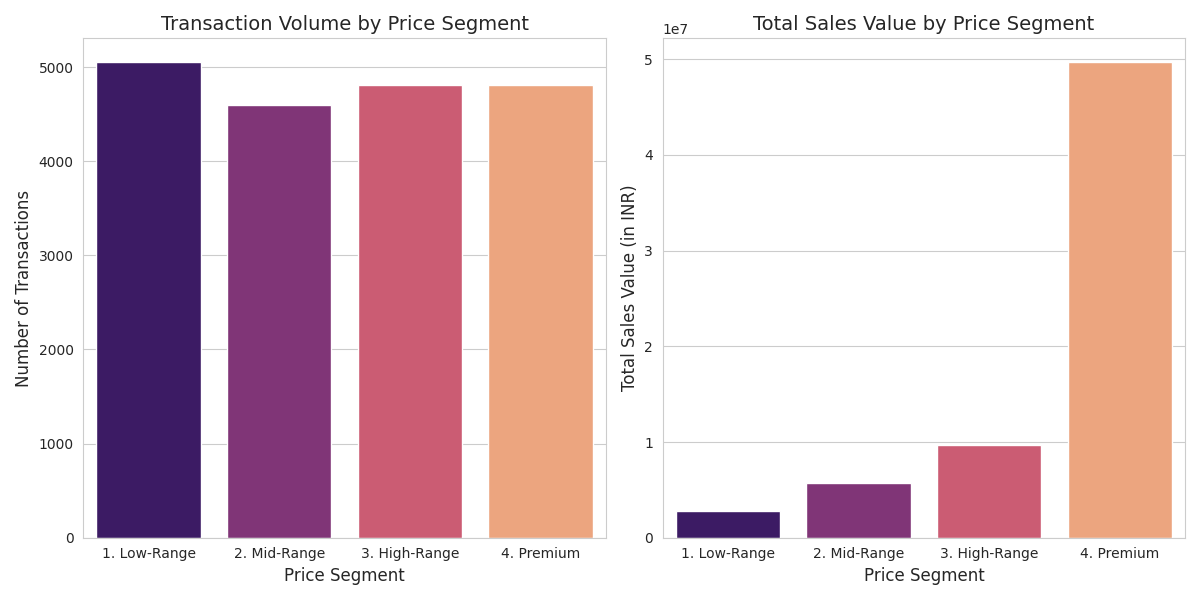

In [8]:
print("--- Price Distribution Chart ---")
display(Image(filename='price_distribution.png'))

print("\n--- Sales by Price Segment Chart ---")
display(Image(filename='sales_by_price_segment.png'))

In [10]:
#
# Step 7: Customer Behavior Analysis (RFM) - CORRECTED CODE
#
print("\nStep 7: Performing RFM analysis to segment customers...")

# --- 1. Calculate RFM Metrics ---
snapshot_date = df_clean['date'].max() + pd.Timedelta(days=1)
rfm_df = df_clean.groupby('user').agg({
    'date': lambda date: (snapshot_date - date.max()).days,
    'product_id': 'count',
    'price': 'sum'
})
rfm_df.rename(columns={'date': 'Recency',
                       'product_id': 'Frequency',
                       'price': 'MonetaryValue'}, inplace=True)

# --- 2. Calculate RFM Scores (Robust Method) ---
# Use rank-based scoring to handle skewed distributions
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'].rank(method='first'), q=4, labels=range(4, 0, -1)).astype(int)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=4, labels=range(1, 5)).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['MonetaryValue'].rank(method='first'), q=4, labels=range(1, 5)).astype(int)

# Combine scores
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# --- 3. Create Customer Segments ---
def assign_rfm_segment(df):
    if (df['R_Score'] >= 3 and df['F_Score'] >= 3):
        return 'Champions'
    elif (df['R_Score'] >= 3 and df['F_Score'] < 3):
        return 'Potential Loyalists'
    elif (df['R_Score'] < 3 and df['F_Score'] >= 3):
        return 'At-Risk Customers'
    elif (df['R_Score'] < 2 and df['F_Score'] < 2):
         return 'Lost Customers'
    else:
        return 'Promising'

rfm_df['Segment'] = rfm_df.apply(assign_rfm_segment, axis=1)

print("\n--- RFM Analysis Results (using robust method) ---")
print(rfm_df.head())

# --- 4. Visualize Customer Segments ---
segment_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='rocket')
plt.title('Customer Segmentation based on RFM Scores', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('customer_segments.png')
plt.close()

print("\n- Generated 'customer_segments.png' using the corrected method.")
print("\n\n RFM analysis complete.")


Step 7: Performing RFM analysis to segment customers...

--- RFM Analysis Results (using robust method) ---
            Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
user                                                                       
user-1           60          1           1799        1        1        2   
user-10          38          3           3907        1        4        3   
user-100          7          1           6999        4        1        4   
user-1000        34          3           8047        2        4        4   
user-10000       61          1           1099        1        1        2   

           RFM_Score              Segment  
user                                       
user-1           112       Lost Customers  
user-10          143    At-Risk Customers  
user-100         414  Potential Loyalists  
user-1000        244    At-Risk Customers  
user-10000       112       Lost Customers  


/tmp/ipython-input-3419750798.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='rocket')



- Generated 'customer_segments.png' using the corrected method.


 RFM analysis complete.


--- Customer Segments Chart ---


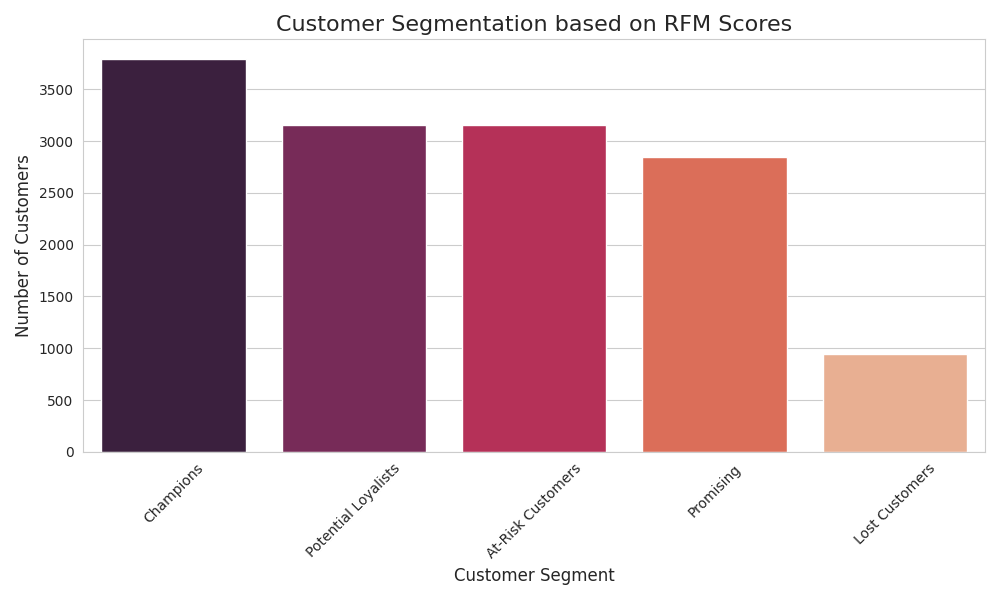

In [11]:
print("--- Customer Segments Chart ---")
display(Image(filename='customer_segments.png'))

In [12]:
#
# Step 8: Geographic Trends Analysis
#
print("\nStep 8: Analyzing geographic sales trends...")

# --- 1. Prepare Data for Geographic Analysis ---
# Create a new dataframe dropping rows where state or city is missing
geo_df = df_clean.dropna(subset=['state', 'city'])
print(f"- Analyzing {len(geo_df)} rows with available geographic data.")

# --- 2. Top States Analysis ---
plt.figure(figsize=(12, 7))

# Top 10 states by transaction volume
top_states_volume = geo_df['state'].value_counts().nlargest(10)
plt.subplot(1, 2, 1)
sns.barplot(y=top_states_volume.index, x=top_states_volume.values, palette="cubehelix")
plt.title('Top 10 States by Transaction Volume', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('State', fontsize=12)

# Top 10 states by sales value
top_states_value = geo_df.groupby('state')['price'].sum().nlargest(10)
plt.subplot(1, 2, 2)
sns.barplot(y=top_states_value.index, x=top_states_value.values, palette="viridis")
plt.title('Top 10 States by Sales Value', fontsize=14)
plt.xlabel('Total Sales Value (in INR)', fontsize=12)
plt.ylabel('')

plt.tight_layout()
plt.savefig('state_sales_trends.png')
plt.close()
print("- Generated 'state_sales_trends.png'")


# --- 3. Top Cities Analysis ---
plt.figure(figsize=(12, 7))

# Top 10 cities by transaction volume
top_cities_volume = geo_df['city'].value_counts().nlargest(10)
plt.subplot(1, 2, 1)
sns.barplot(y=top_cities_volume.index, x=top_cities_volume.values, palette="cubehelix")
plt.title('Top 10 Cities by Transaction Volume', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('City', fontsize=12)

# Top 10 cities by sales value
top_cities_value = geo_df.groupby('city')['price'].sum().nlargest(10)
plt.subplot(1, 2, 2)
sns.barplot(y=top_cities_value.index, x=top_cities_value.values, palette="viridis")
plt.title('Top 10 Cities by Sales Value', fontsize=14)
plt.xlabel('Total Sales Value (in INR)', fontsize=12)
plt.ylabel('')

plt.tight_layout()
plt.savefig('city_sales_trends.png')
plt.close()
print("- Generated 'city_sales_trends.png'")

print("\n\n Geographic analysis complete.")


Step 8: Analyzing geographic sales trends...
- Analyzing 5954 rows with available geographic data.


/tmp/ipython-input-3893650739.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states_volume.index, x=top_states_volume.values, palette="cubehelix")
/tmp/ipython-input-3893650739.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states_value.index, x=top_states_value.values, palette="viridis")


- Generated 'state_sales_trends.png'


/tmp/ipython-input-3893650739.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities_volume.index, x=top_cities_volume.values, palette="cubehelix")
/tmp/ipython-input-3893650739.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities_value.index, x=top_cities_value.values, palette="viridis")


- Generated 'city_sales_trends.png'


 Geographic analysis complete.


--- Sales Trends by State ---


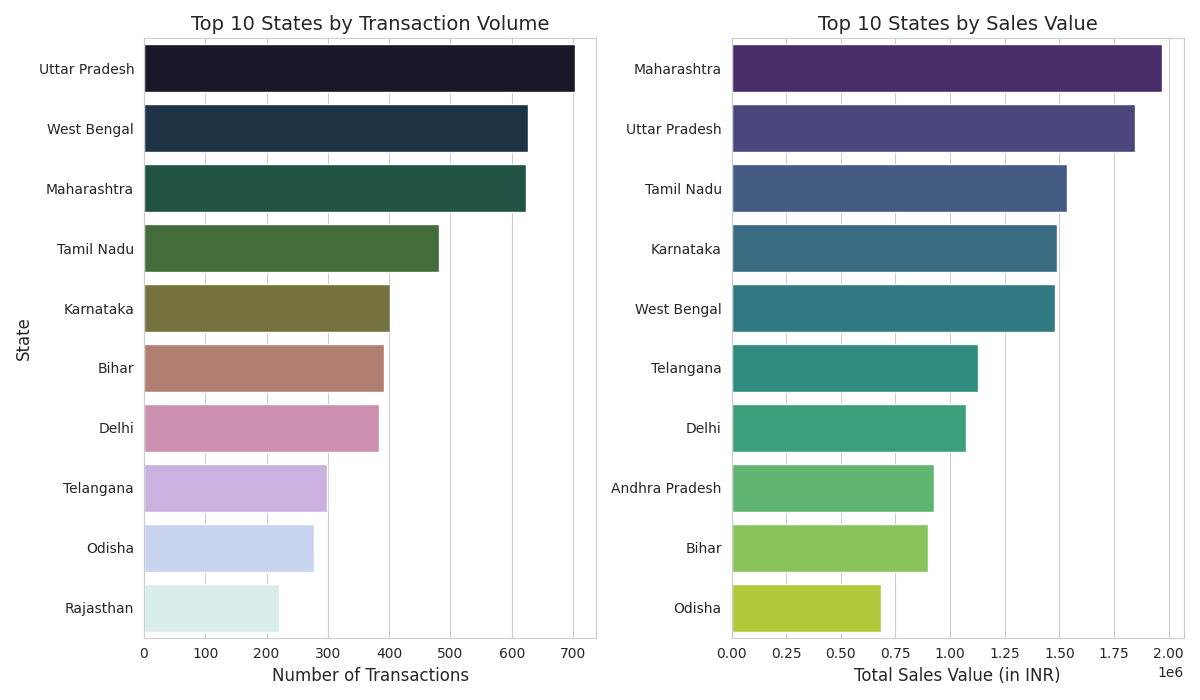


--- Sales Trends by City ---


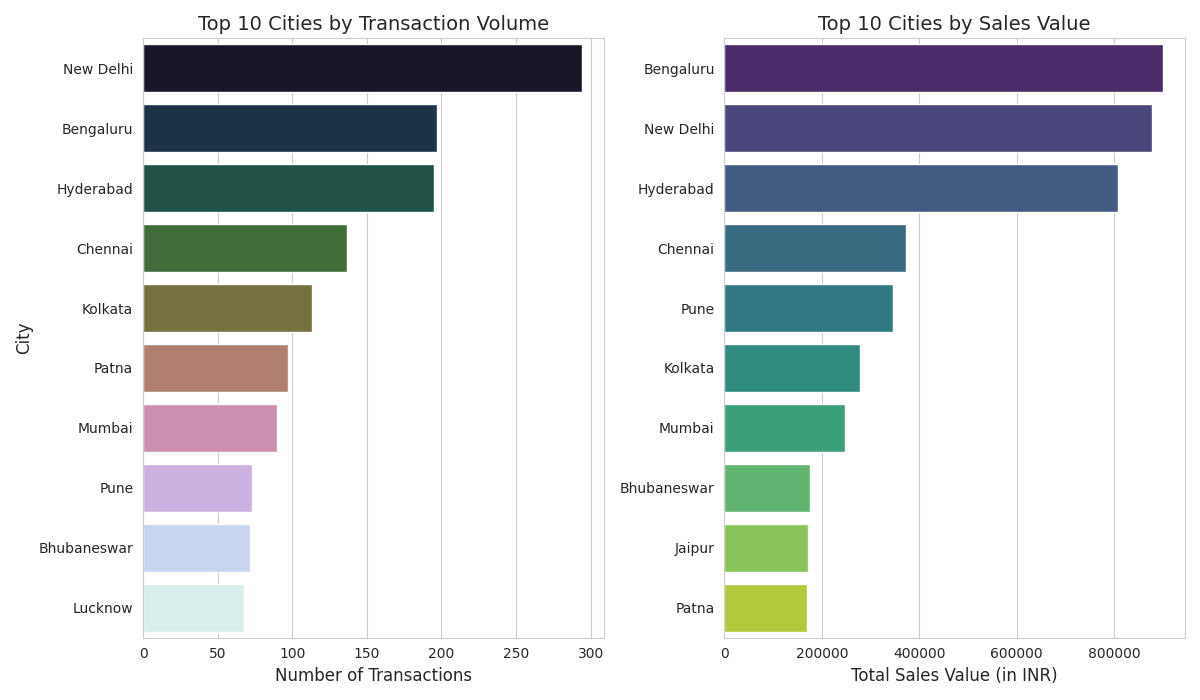

In [13]:
print("--- Sales Trends by State ---")
display(Image(filename='state_sales_trends.png'))

print("\n--- Sales Trends by City ---")
display(Image(filename='city_sales_trends.png'))

In [14]:
#
# Step 9: Cohorts & Retention Analysis
#
print("\nStep 9: Performing cohort analysis to understand customer retention...")

# --- 1. Prepare the Data for Cohort Analysis ---

# Create a 'transaction_month' column
df_clean['transaction_month'] = df_clean['date'].dt.to_period('M')

# Create a 'cohort' column (month of first purchase for each user)
df_clean['cohort'] = df_clean.groupby('user')['date'].transform('min').dt.to_period('M')

# --- 2. Calculate Monthly Active Users per Cohort ---

def get_cohort_data(df):
    # Count unique users for each cohort and transaction month
    cohort_data = df.groupby(['cohort', 'transaction_month'])['user'].nunique().reset_index()

    # Calculate the 'cohort_index' (months since first purchase)
    cohort_data['cohort_index'] = (cohort_data['transaction_month'] - cohort_data['cohort']).apply(lambda x: x.n)

    # Get the initial cohort size (total unique users in each cohort)
    cohort_sizes = cohort_data[cohort_data['cohort_index'] == 0].set_index('cohort')['user']

    # Merge to get cohort size for each row
    cohort_data = cohort_data.merge(cohort_sizes.rename('cohort_size'), on='cohort')

    return cohort_data

cohort_analysis_data = get_cohort_data(df_clean)


# --- 3. Create the Retention Matrix ---

# Pivot the data to create a matrix of cohort sizes over time
cohort_matrix = cohort_analysis_data.pivot_table(index='cohort',
                                                  columns='cohort_index',
                                                  values='user')

# Calculate retention rate by dividing by the initial cohort size
retention_matrix = cohort_matrix.divide(cohort_matrix.iloc[:, 0], axis=0)

# --- 4. Visualize the Retention Heatmap ---

plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='viridis')
plt.title('Monthly Customer Retention Rate by Cohort', fontsize=16)
plt.xlabel('Months Since First Purchase', fontsize=12)
plt.ylabel('First Purchase Month (Cohort)', fontsize=12)
plt.tight_layout()
plt.savefig('retention_heatmap.png')
plt.close()

print("- Generated 'retention_heatmap.png'")
print("\n\n Cohort and retention analysis complete.")
print("\n\n🎉 All analyses from the project guidelines are now finished!")


Step 9: Performing cohort analysis to understand customer retention...
- Generated 'retention_heatmap.png'


 Cohort and retention analysis complete.


🎉 All analyses from the project guidelines are now finished!


--- Customer Retention Heatmap ---


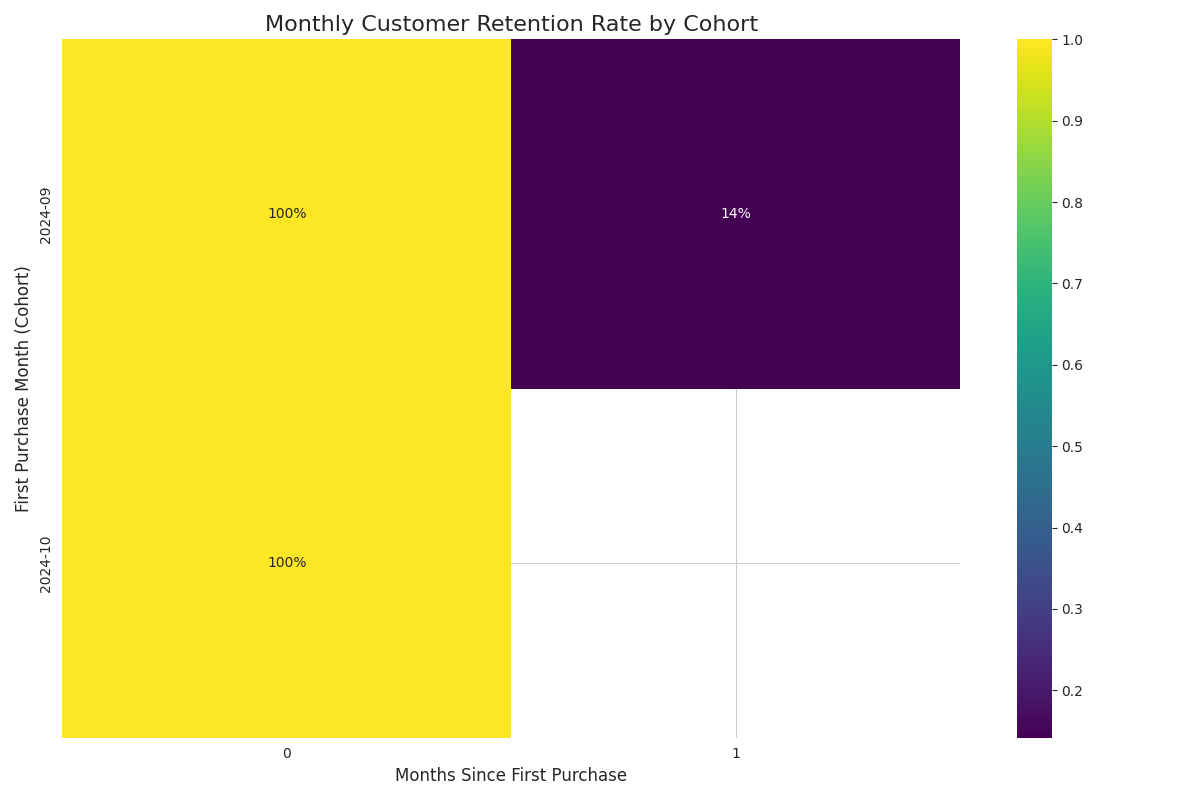

In [15]:
print("--- Customer Retention Heatmap ---")
display(Image(filename='retention_heatmap.png'))